https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [64]:
def get_clf_eval(y_test,  pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도:{1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}, AUC:{4:.4f}\n'.format(accuracy, precision, recall, f1, roc_score))

In [65]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value');
    plt.ylabel('Precision and recall value')
    
    plt.legend();
    plt.grid()
    plt.show()

In [66]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [67]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도:0.7111, 재현율: 0.5926, f1: 0.6465, AUC:0.7313



C:\Users\SYeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[0.04169823]
 [0.20916113]
 [0.16485423]
 [0.51654966]
 [0.08160187]
 [0.69377401]
 [0.71305198]
 [0.18560142]
 [0.18710951]
 [0.20066917]
 [0.62787575]
 [0.4836696 ]
 [0.07644053]
 [0.34852759]
 [0.26340726]
 [0.14253333]
 [0.71544068]
 [0.34134033]
 [0.03127273]
 [0.71617739]
 [0.35073842]
 [0.30480323]
 [0.07256872]
 [0.33017227]
 [0.30051461]
 [0.14751751]
 [0.84923811]
 [0.65841471]
 [0.25147956]
 [0.79317198]
 [0.20204876]
 [0.22286283]
 [0.17973561]
 [0.24995395]
 [0.17611412]
 [0.57909995]
 [0.28692157]
 [0.54659256]
 [0.74865722]
 [0.63227317]
 [0.484719  ]
 [0.29951558]
 [0.59457022]
 [0.21643926]
 [0.3504182 ]
 [0.05716043]
 [0.71565803]
 [0.13284769]
 [0.50012474]
 [0.31775337]
 [0.32252264]
 [0.81025942]
 [0.83223446]
 [0.1131111 ]
 [0.18898903]
 [0.37459248]
 [0.10653229]
 [0.38931188]
 [0.34619708]
 [0.44239159]
 [0.22797636]
 [0.72701164]
 [0.31268854]
 [0.60787599]
 [0.27542906]
 [0.15392773]
 [0.22645236]
 [0.71076574]
 [0.19029032]
 [0.72374355]
 [0.12307413]
 [0.33

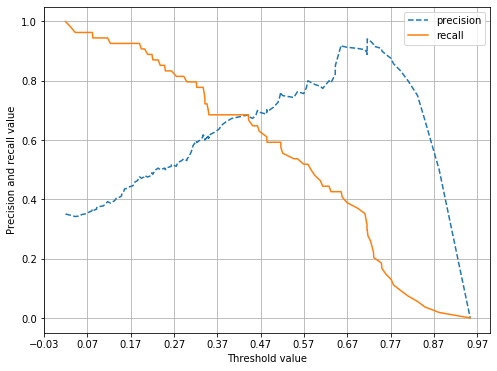

In [68]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
print(pred_proba_c1.reshape(-1, 1))
precision_recall_curve_plot(y_test, pred_proba_c1)

In [69]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

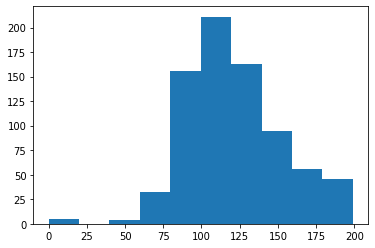

In [70]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [71]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))
    mean_zero_features = diabetes_data[zero_features].mean()
    diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


In [72]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X)
print('AA',X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

C:\Users\SYeong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
def get_eval_by_threshold(y_test, pred_proba_c1, threshold):
    for custom_threshold in threshold:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)


In [74]:
threshold = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), threshold)

임곗값: 0.3
오차 행렬
[[65 35]
 [11 43]]
정확도: 0.7013, 정밀도:0.5513, 재현율: 0.7963, f1: 0.6515, AUC:0.7231

임곗값: 0.33
오차 행렬
[[71 29]
 [11 43]]
정확도: 0.7403, 정밀도:0.5972, 재현율: 0.7963, f1: 0.6825, AUC:0.7531

임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도:0.6190, 재현율: 0.7222, f1: 0.6667, AUC:0.7411

임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도:0.6333, 재현율: 0.7037, f1: 0.6667, AUC:0.7419

임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도:0.6923, 재현율: 0.6667, f1: 0.6792, AUC:0.7533

임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도:0.7059, 재현율: 0.6667, f1: 0.6857, AUC:0.7583

임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도:0.7447, 재현율: 0.6481, f1: 0.6931, AUC:0.7641

임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도:0.7674, 재현율: 0.6111, f1: 0.6804, AUC:0.7556



In [75]:
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))
get_clf_eval(y_test, pred_th_048)

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도:0.7447, 재현율: 0.6481, f1: 0.6931, AUC:0.7641

